# Import necessary data manipulation and visualization packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load data from the PokeDex

In [2]:
# Image source: https://articles.pokebattler.com/2018/08/30/pogo-pokedex-by-the-numbers/

![Pokedex](https://articles.pokebattler.com/wp-content/uploads/2018/08/pokedex-kanto-1.jpg)

In [3]:
poke_dex_data = pd.read_csv("Pokemon.csv")

# Initial look at the Pokemon data

In [4]:
poke_dex_data

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,,Ice,,580,100,145,130,65,110,30,8
1041,897,Spectrier,,Ghost,,580,100,65,60,145,80,130,8
1042,898,Calyrex,,Psychic,Grass,500,100,80,80,80,80,80,8
1043,898,Calyrex,Ice Rider,Psychic,Ice,680,100,165,150,85,130,50,8


# No rows with missing data

In [5]:
poke_dex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1045 non-null   int64 
 1   Name        1045 non-null   object
 2   Form        1045 non-null   object
 3   Type1       1045 non-null   object
 4   Type2       1045 non-null   object
 5   Total       1045 non-null   int64 
 6   HP          1045 non-null   int64 
 7   Attack      1045 non-null   int64 
 8   Defense     1045 non-null   int64 
 9   Sp. Atk     1045 non-null   int64 
 10  Sp. Def     1045 non-null   int64 
 11  Speed       1045 non-null   int64 
 12  Generation  1045 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 106.3+ KB


In [6]:
percent_missing = poke_dex_data.isnull().sum() / poke_dex_data.shape[0] * 100
percent_missing

ID            0.0
Name          0.0
Form          0.0
Type1         0.0
Type2         0.0
Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
dtype: float64

# Basic statistics for columns with number values

In [7]:
# Statistics don't apply to the ID or Generation columns
poke_dex_data.describe()

,ID,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,440.769378,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656,4.454545
std,262.517231,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094,2.269043
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,212.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,3.000000
50%,436.000000,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,5.000000
75%,670.000000,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,898.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


# Some columns aren't useful for visuals or statistics, let's create a subset of only useful data

In [8]:
subset_pokemon_data = poke_dex_data.copy(deep=True)
subset_pokemon_data.drop(['ID', 'Generation'], axis=1, inplace=True)
subset_pokemon_data.head(9)

,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,,Grass,Poison,525,80,82,83,100,100,80
3,Charmander,,Fire,,309,39,52,43,60,50,65
4,Charmeleon,,Fire,,405,58,64,58,80,65,80
5,Charizard,,Fire,Flying,534,78,84,78,109,85,100
6,Squirtle,,Water,,314,44,48,65,50,64,43
7,Wartortle,,Water,,405,59,63,80,65,80,58
8,Blastoise,,Water,,530,79,83,100,85,105,78


# Heatmap correlations between various columns of numerical data

AxesSubplot(0.125,0.125;0.62x0.755)


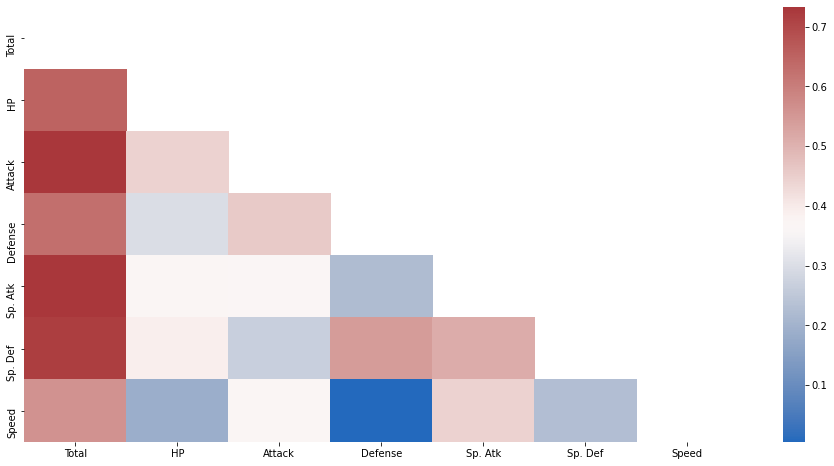

In [28]:
# Outside of the 'Total' column values, the strongest correlation is between 'Defense' and 'Sp. Def'
# I ignore the 'Total' column in this case as it's a cumulative value of the other Pokemon attributes shown

correlations = subset_pokemon_data.corr()
f, ax = plt.subplots(figsize=(16, 8))
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

heatmap_one = sns.heatmap(correlations, mask=mask, cmap='vlag')
print(heatmap_one)

# Let's look at some visuals between 'Defense', 'Sp. Def' and 'Type1'

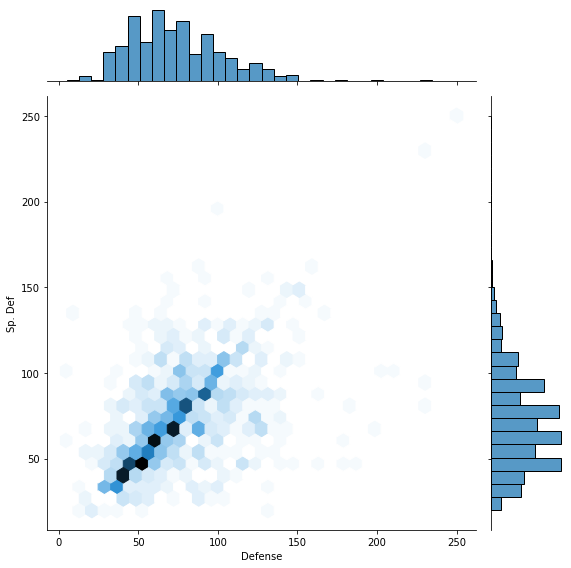

In [10]:
sns.jointplot(x='Defense', y='Sp. Def', data=subset_pokemon_data, kind='hex', height=8)

<AxesSubplot:xlabel='Type1', ylabel='Defense'>

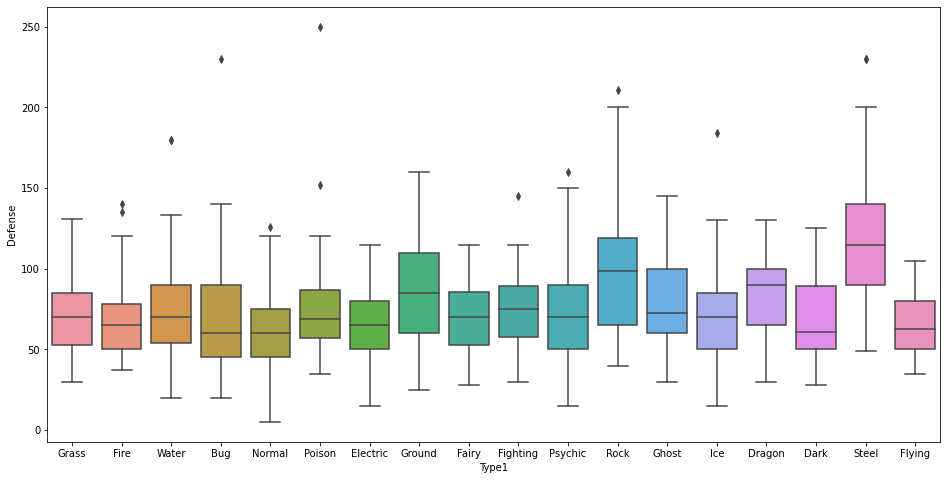

In [11]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=subset_pokemon_data, x='Type1', y='Defense')

<AxesSubplot:xlabel='Type1', ylabel='Sp. Def'>

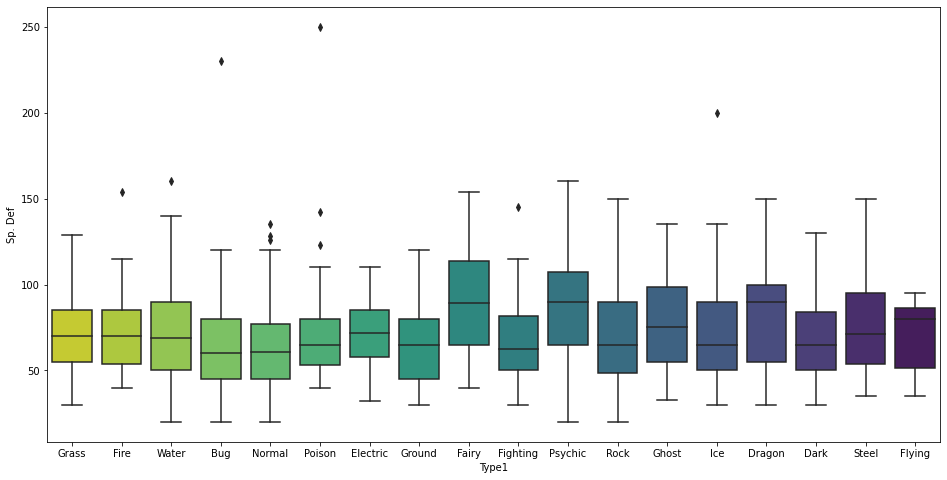

In [22]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=subset_pokemon_data, x='Type1', y='Sp. Def', palette='viridis_r')

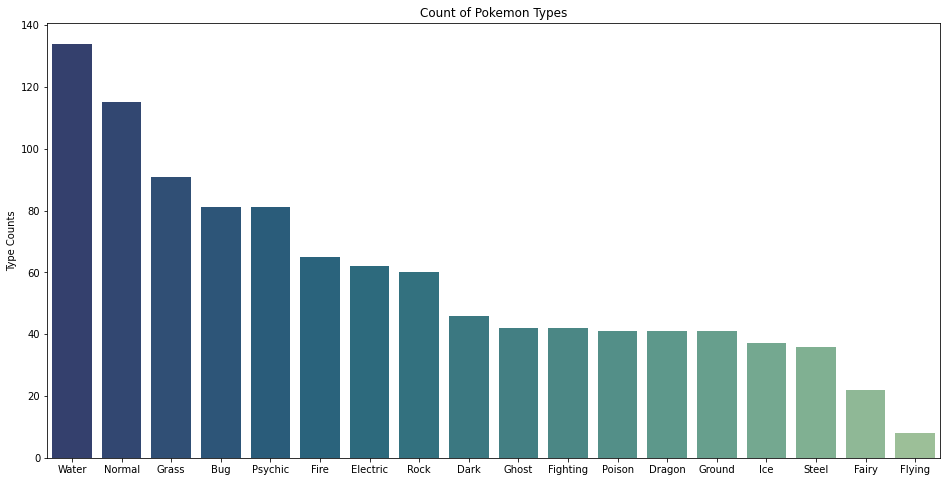

In [23]:
type_counts = subset_pokemon_data.Type1.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(16, 8))
sns.barplot(type_counts.index, type_counts.values, palette="crest_r")
plt.ylabel("Type Counts")
plt.title("Count of Pokemon Types");